# <font color=red>Task #2 To Explore Supervised Machine Learning</font>

<br>
<br>

### <font color=blue>Project Statement : </font>
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
<br>

#### What will be predicted score if a student study for 9.25 hrs in a day?

<br>
<br>

#### Importing necessary libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Importing the Dataset

In [78]:
df = pd.read_csv('student_scores.csv')

In [79]:
df.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [80]:
#checking the shape of the dataset
df.shape

(25, 2)

In [81]:
#viewing the statistical details of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [82]:
#displaying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [83]:
#checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<br>
<br>

#### Data Visualization

In [84]:
fig = px.scatter(df, x="Hours", y="Scores", 
                 size='Scores',title='Hours vs Scores',
                 hover_data=['Hours','Scores']) 

fig.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<br>
<br>

In [85]:
#checking correlation of both attributes
cor = px.imshow(df.corr())
cor.show()

It is clearly seen that both the attributes have a positive correlation to each other


<br>
<br>

#### Data Preprocessing

In [86]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#### Splitting data into training and test sets

In [87]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Training the Algorithm

In [88]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### plotting the regression line

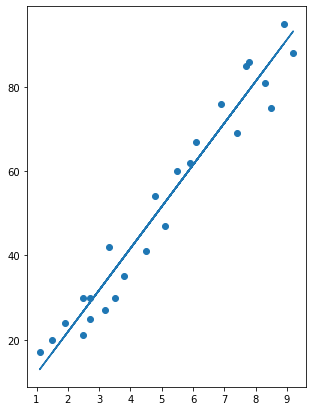

In [89]:

line = lr.coef_ * X + lr.intercept_

plt.figure(figsize=(5,7))
plt.scatter(X,y) 
plt.plot(X,line)
plt.show()


In [90]:
#Retrieving the intercept
print(lr.intercept_)

2.0181600414346974


In [91]:
#Retrieving the coefficient
print(lr.coef_)

[9.91065648]


<br>
<br>

#### Making Predictions

In [92]:
y_pred = lr.predict(X_test)

In [93]:
#comparing the actual output values with the predicted values
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### We can also visualize comparison result as a bar graph using the below script 

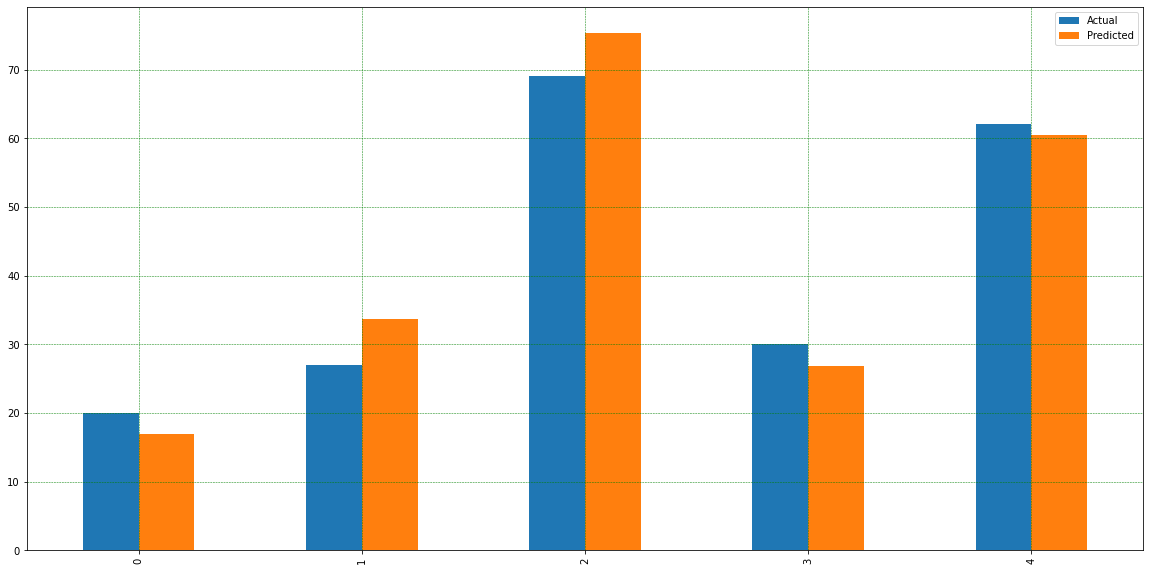

In [94]:
df1 = df_compare
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<br>
<br>

<br>
<br>

#### Performance of the model

In [95]:
print("Training Accuracy :",100*lr.score(X_train,y_train).round(5),'%')
print("Testing Accuracy :",100*lr.score(X_test,y_test).round(5),'%')

Training Accuracy : 95.155 %
Testing Accuracy : 94.549 %


In [96]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


the root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.

<br>
<br>


#### predicting score if a student study for 9.25 hrs in a day

In [103]:
hours = 9.25
hrs = np.reshape((np.array(hours)),(-1,1))
own_pred = regressor.predict(hrs)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(2)))

No of Hours = 9.25
Predicted Score = 93.69
